In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,accuracy_score

In [2]:
# loading data set 
wine=pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# To get the info about the null values in order to do the preprocessing if there are any
wine.isnull().sum()
# No null values so we are ready to go

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#  Preprocessing of data

In [6]:
bins = (2,6.5,8) # value lies b/w 2 to 8 so values < 6.5 -> bad(0) & values > good(1)
group_names=[0,1]
# updating Quality Attributes acc to bin.
wine['quality']=pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()
#The 'pd.cut()' function is used to bin the values of the 'quality' column into the specified intervals, and the corresponding labels are assigned to each bin. The resulting column contains the labels "0" or "1" for each value of 'quality', depending on which bin the value falls into.

[0, 1]
Categories (2, int64): [0 < 1]

In [7]:
wine.head(11)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [8]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

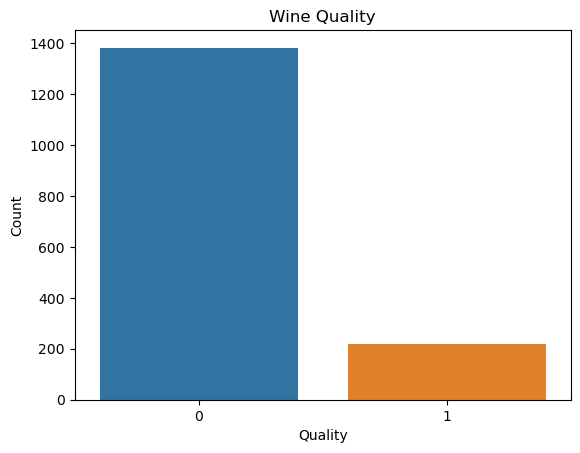

In [9]:
# Create the count plot
sns.countplot(x='quality', data=wine)

# Add labels and title
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Wine Quality')

# Show the plot
plt.show()

In [10]:
# Now Seperate our dataset as response variable and features variables(independent)
X = wine.iloc[:,:11] # Input
y = wine.iloc[:,-1] # Output
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: category
Categories (2, int64): [0 < 1]

In [11]:
# train and splitting of data
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# Applying standard scaling to get optimized result

sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Decision Tree

In [13]:
# Model Building
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)
# Function To make predictions
pred_dt = clf_entropy.predict(X_test)

In [14]:
# Let's see how our model performed
print("Classification Report:-")
print(classification_report(y_test,pred_dt))
print("\nConfusion Matrix:-")
c1 = confusion_matrix(y_test,pred_dt)
print(c1)

Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.55      0.23      0.33        47

    accuracy                           0.86       320
   macro avg       0.72      0.60      0.62       320
weighted avg       0.83      0.86      0.83       320


Confusion Matrix:-
[[264   9]
 [ 36  11]]


In [15]:
ac1 = accuracy_score(y_test,pred_dt)
fs1 = f1_score(y_test,pred_dt)
ac1= ac1*100
fs1= fs1*100
print("Accuracy_Score:",ac1,"%")
print("F1_Score:",fs1,"%")

Accuracy_Score: 85.9375 %
F1_Score: 32.83582089552239 %


Text(0.5, 1.0, '90%')

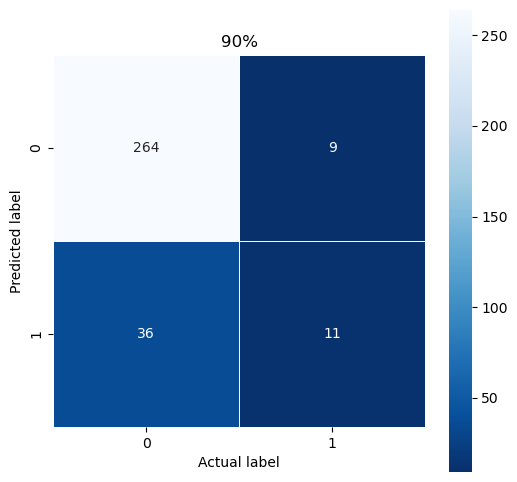

In [16]:
# Plotting Heatmap of Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(c1,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("90%")

# Random Forest Classifier

In [17]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train) # fit the train data to the random forest
pred_rfc=rfc.predict(X_test)


In [18]:
# Let's see how our model performed
print("Classification Report:-")
print(classification_report(y_test,pred_rfc))
print("\nConfusion Matrix:-")
c2 = confusion_matrix(y_test,pred_rfc)
print(c2)

Classification Report:-
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320


Confusion Matrix:-
[[264   9]
 [ 23  24]]


In [19]:
ac2 = accuracy_score(y_test,pred_rfc)
fs2 = f1_score(y_test,pred_rfc)
ac2= ac2*100
fs2= fs2*100
print("Accuracy_Score:",ac2,"%")
print("F1_Score:",fs2,"%")

Accuracy_Score: 90.0 %
F1_Score: 59.999999999999986 %


Text(0.5, 1.0, '90%')

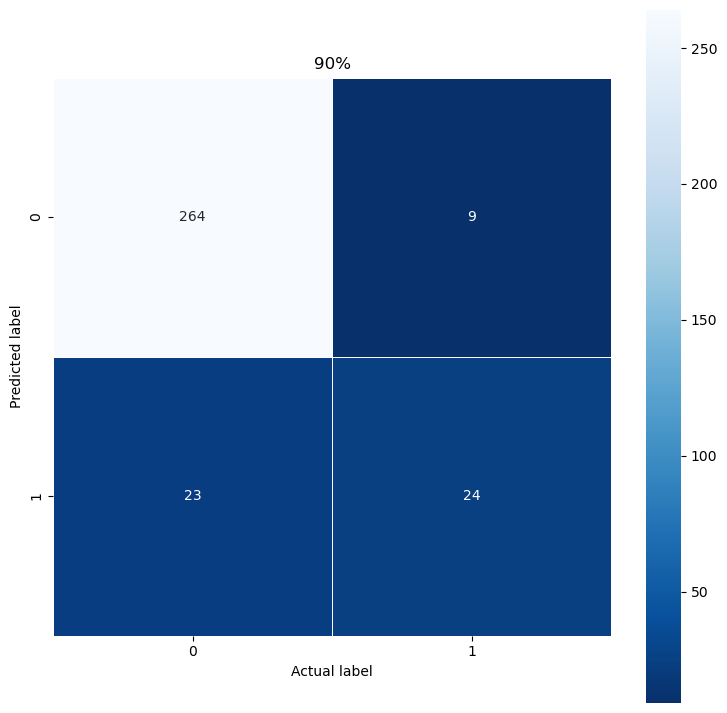

In [20]:
# Plotting Heatmap of Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(c2,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("90%")

# KNN

In [21]:
classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
# p=2 -> Euclidean distance 1-> for Manhattan
classifier.fit(X_train,y_train)
pred_knn = classifier.predict(X_test)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:

# Let's see how our model performed
print("Classification Report:-")
print(classification_report(y_test,pred_knn))
print("\nConfusion Matrix:-")
c3 = confusion_matrix(y_test,pred_knn)
print(c3)


Classification Report:-
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.77      0.68      0.71       320
weighted avg       0.86      0.88      0.87       320


Confusion Matrix:-
[[262  11]
 [ 28  19]]


In [23]:
ac3 = accuracy_score(y_test,pred_knn)
fs3 = f1_score(y_test,pred_knn)
ac3= ac3*100
fs3= fs3*100
print("Accuracy_Score:",ac3,"%")
print("F1_Score:",fs3,"%")

Accuracy_Score: 87.8125 %
F1_Score: 49.35064935064935 %


Text(0.5, 1.0, '86.5625 %')

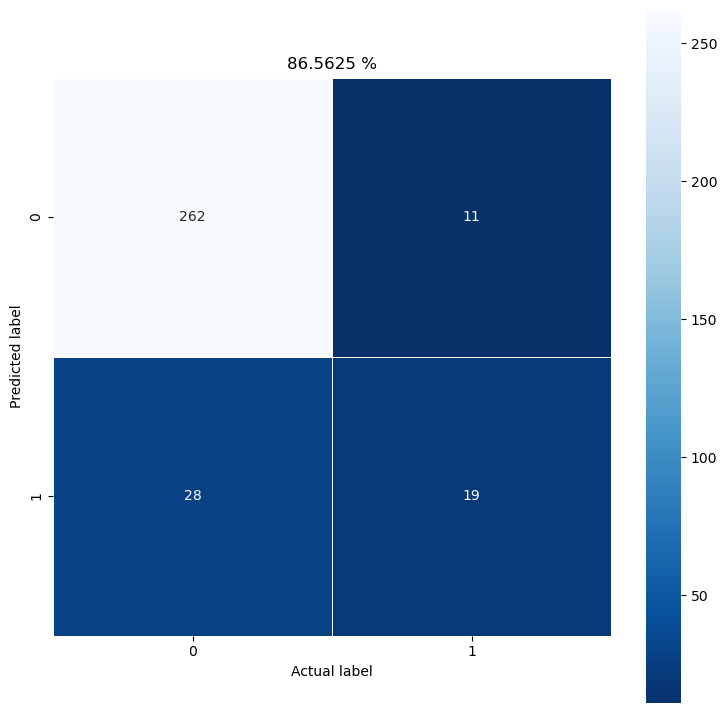

In [24]:
# Plotting Heatmap of Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(c3,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("86.5625 %")

# SVM

In [25]:
clf = SVC()
clf.fit(X_train,y_train)
pred_svm = clf.predict(X_test)

In [26]:

# Let's see how our model performed
print("Classification Report:-")
print(classification_report(y_test,pred_svm))
print("\nConfusion Matrix:-")
c4 = confusion_matrix(y_test,pred_svm)
print(c4)


Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320


Confusion Matrix:-
[[268   5]
 [ 35  12]]


In [27]:
ac4 = accuracy_score(y_test,pred_svm)
fs4 = f1_score(y_test,pred_svm)
ac4= ac4*100
fs4= fs4*100
print("Accuracy_Score:",ac4,"%")
print("F1_Score:",fs4,"%")

Accuracy_Score: 87.5 %
F1_Score: 37.49999999999999 %


Text(0.5, 1.0, '87.5 %')

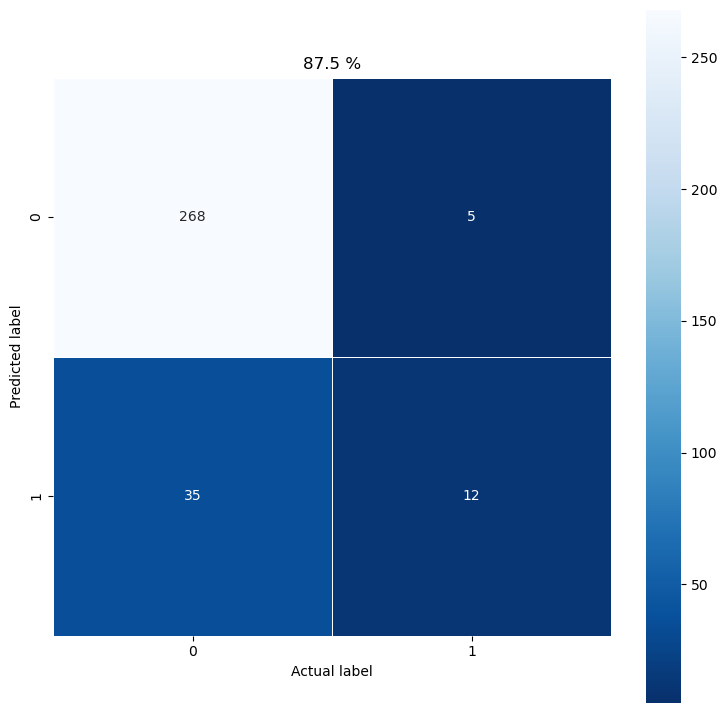

In [28]:
# Plotting Heatmap of Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(c4,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("87.5 %")

# Logistic regression

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
pred_lg = log_reg.predict(X_test)

In [30]:
# Let's see how our model performed
print("Classification Report:-")
print(classification_report(y_test,pred_lg))
print("\nConfusion Matrix:-")
c5 = confusion_matrix(y_test,pred_lg)
print(c5)

Classification Report:-
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320


Confusion Matrix:-
[[264   9]
 [ 34  13]]


In [31]:
ac5 = accuracy_score(y_test,pred_lg)
fs5 = f1_score(y_test,pred_lg)
ac5= ac5*100
fs5= fs5*100
print("Accuracy_Score:",ac5,"%")
print("F1_Score:",fs5,"%")

Accuracy_Score: 86.5625 %
F1_Score: 37.68115942028986 %


Text(0.5, 1.0, '86.5625 %')

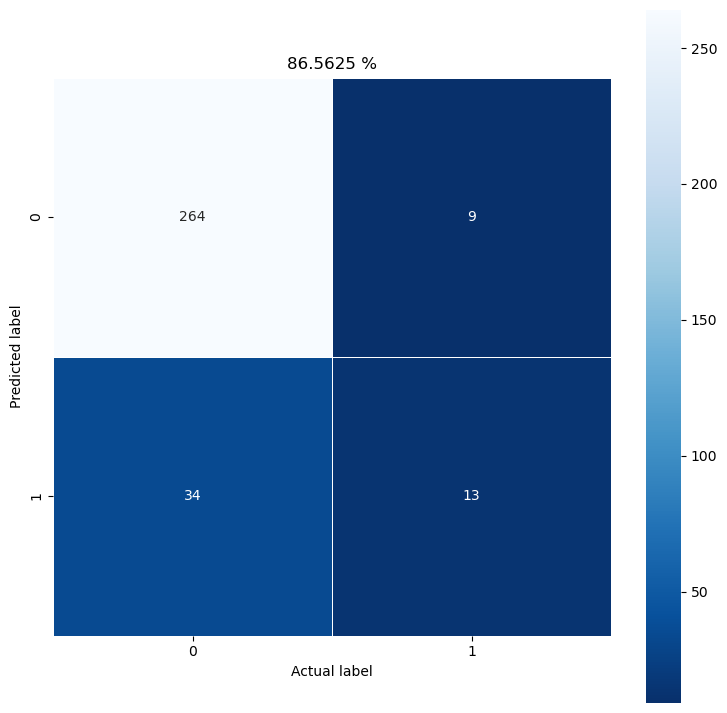

In [32]:
# Plotting Heatmap of Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(c5,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("86.5625 %")

# Neural Networks

In [33]:
# From Large no. of datas Neural netwoks is best.
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:

# Let's see how our model performed
print("Classification Report:-")
print(classification_report(y_test,pred_mlpc))
print("\nConfusion Matrix:-")
c6 = confusion_matrix(y_test,pred_mlpc)
print(c6)

Classification Report:-
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.65      0.60      0.62        47

    accuracy                           0.89       320
   macro avg       0.79      0.77      0.78       320
weighted avg       0.89      0.89      0.89       320


Confusion Matrix:-
[[258  15]
 [ 19  28]]


In [35]:
ac6 = accuracy_score(y_test,pred_mlpc)
fs6 = f1_score(y_test,pred_mlpc)
ac6= ac6*100
fs6= fs6*100
print("Accuracy_Score:",ac6,"%")
print("F1_Score:",fs6,"%")

Accuracy_Score: 89.375 %
F1_Score: 62.22222222222222 %


Text(0.5, 1.0, '86.5625 %')

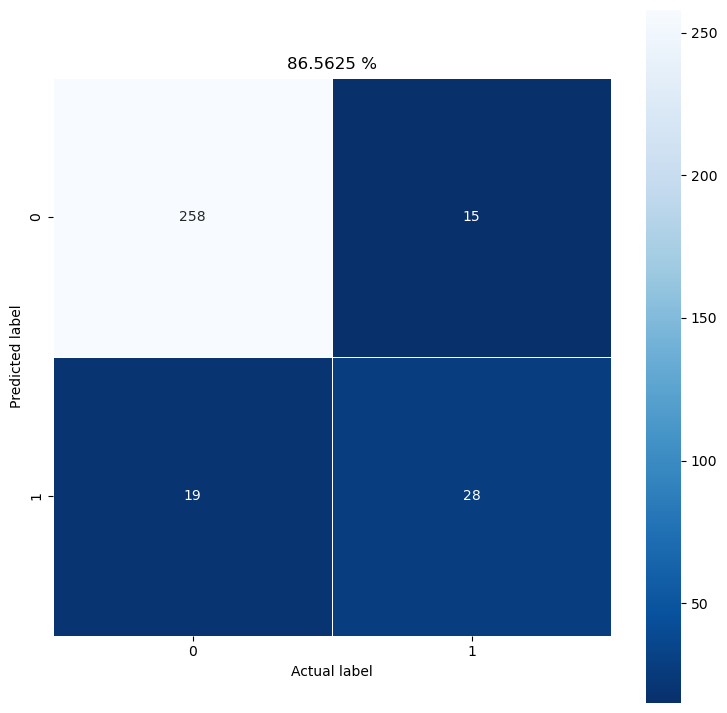

In [36]:
# Plotting Heatmap of Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(c6,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("86.5625 %")

From all the different classification Random Forest model gives the best accuracy result of 90% so we will use it for classifying new data .

In [37]:
# Checking whether a new wine is good or bad
Xnew=[[7.3,0.58,0.04,1.29,0.065,15.0,21.0,0.9946,3.36,0.47,10.0]]
Xnew=sc.transform(Xnew)
ynew=rfc.predict(Xnew)
bx = ynew
if bx == 0:
    print("Bad Quality of wine")
else:
    print("Good Quality of wine")


Bad Quality of wine


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
